In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# データの読み込み
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# 性別データの変換
train = train.replace({'male':0, 'female':1})
test = test.replace({'male':0, 'female':1})

/tmp/ipykernel_18/1668147272.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({'male':0, 'female':1})
/tmp/ipykernel_18/1668147272.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.replace({'male':0, 'female':1})


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [7]:
# Embarkedの欠損値を埋め、ダミー変数化
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

train_add_dum = pd.get_dummies(train['Embarked'], dtype='uint8')
test_add_dum = pd.get_dummies(test['Embarked'], dtype='uint8')

train_add_dum = pd.concat([train, train_add_dum], axis=1)
test_add_dum = pd.concat([test, test_add_dum], axis=1)

display(train_add_dum.info())
train_add_dum.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  C            891 non-null    uint8  
 13  Q            891 non-null    uint8  
 14  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.3+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [8]:
# 年齢の空白データを削除
train_age_clean = train_add_dum.dropna(subset='Age')
train_age_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    object 
 12  C            714 non-null    uint8  
 13  Q            714 non-null    uint8  
 14  S            714 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 74.6+ KB


In [9]:
# 使用特徴量とターゲットを抽出する
feature_list = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', "C", "Q", "S" ]
train_features = train_age_clean[feature_list]
train_target = train_age_clean['Survived']

In [10]:
# ランダムフォレストによる重要特徴量を確認する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, random_state=5)

from sklearn.ensemble import RandomForestClassifier
feature_names = feature_list
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

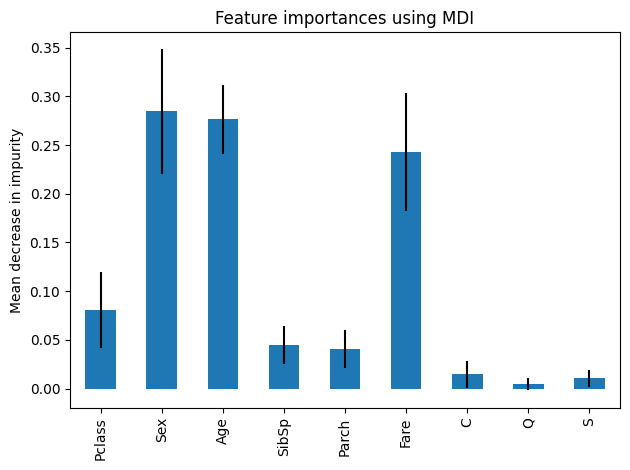

In [11]:
# 不純度減少に基づく特徴の重要性の確認
import numpy as np
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

<Axes: xlabel='Pclass', ylabel='Fare'>

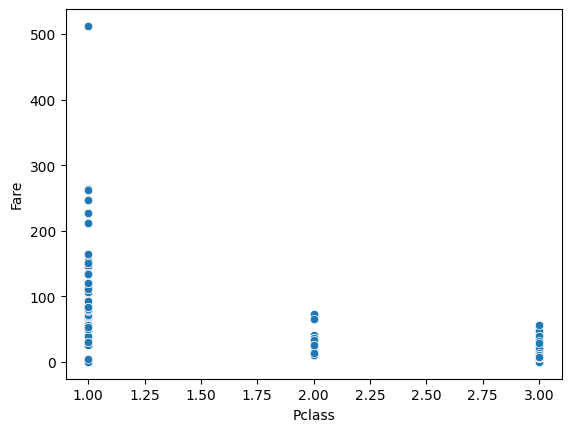

In [12]:
sns.scatterplot(x='Pclass', y='Fare', data=train_age_clean)

In [13]:
# Fareの欠損値をチケットクラスごとの中央値で埋める
train_add_dum.loc[train_add_dum['Fare'].isnull(), 'Fare'] = train_add_dum.groupby('Pclass')['Fare'].transform('median')
test_add_dum.loc[test_add_dum['Fare'].isnull(), 'Fare'] = test_add_dum.groupby('Pclass')['Fare'].transform('median')

In [14]:
# 'Age'の欠損値をチケットクラスごとの中央値で埋める
train_add_dum.loc[train_add_dum['Age'].isnull(), 'Age'] = train_add_dum.groupby('Pclass')['Age'].transform('median')
test_add_dum.loc[test_add_dum['Age'].isnull(), 'Age'] = test_add_dum.groupby('Pclass')['Age'].transform('median')
display(train_add_dum.info())
display(test_add_dum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  C            891 non-null    uint8  
 13  Q            891 non-null    uint8  
 14  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  C            418 non-null    uint8  
 12  Q            418 non-null    uint8  
 13  S            418 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 37.3+ KB


None

In [15]:
train_features = train_add_dum[['Sex','Age', 'Fare']].values
train_target = train['Survived'].values
train_features_tr, train_features_va, train_target_tr, train_target_va = train_test_split(train_features, train_target, test_size=0.2, random_state=0)

In [16]:
display(train_features_tr.shape)
display(train_features_va.shape)
display(train_target_tr.shape)
display(train_target_va.shape)

(712, 3)

(179, 3)

(712,)

(179,)

In [17]:
# グリッドサーチの実行
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=0)

max_depth = [4, 5, 6, 7, 8, 9, 10]
n_estimators = [120, 130, 140, 150, 160]

params = {'max_depth':max_depth, 'n_estimators':n_estimators}

grid_cv = GridSearchCV(estimator=rf_model, param_grid=params, cv=5)
grid_cv.fit(train_features_tr, train_target_tr)

display(grid_cv.best_params_, grid_cv.best_score_, grid_cv.score(train_features_va, train_target_va))

{'max_depth': 5, 'n_estimators': 160}

0.7935585541219343

0.8100558659217877

In [18]:
model = RandomForestClassifier(n_estimators =5 , max_depth=160 , random_state=0)
model.fit(train_features, train_target)

RandomForestClassifier(max_depth=160, n_estimators=5, random_state=0)

In [19]:
test_features = test_add_dum[['Sex', 'Age', 'Fare']].values
predict_test_target = model.predict(test_features)
predict_test_target.shape

(418,)

In [20]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predict_test_target})
submission.to_csv('submission_RandomForestClassifier_4.csv', index=False)